In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

selected=['CNP','F','WMT','TSLA','GE']
data = pd.read_csv("qandl-data-2014-2016.csv", index_col='date' )
data = data.drop('None', axis=1)


In [9]:
table = data.pivot(columns='ticker')
table.head()

returns_daily = table.pct_change()
returns_daily.head(20)
returns_annual = returns_daily.mean() *250
cov_daily = returns_daily.cov()
cov_annual = cov_daily *250

port_returns=[]
port_volatility = []
port_weights = []

num_assets = len(selected)
num_portfolios = 50000

np.random.seed =(101)

for p in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /=np.sum(weights)
                     
    returns = np.dot(weights,returns_annual)

    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual,weights)))

    port_returns.append(returns)
    port_volatility.append(volatility)
    port_weights.append(weights)


portfolio ={'Returns': port_returns, 'Volatility':port_volatility}

for counter, symbol in enumerate(selected):
    portfolio[symbol+' Weight'] = [Weight[counter]for Weight in port_weights]

df = pd.DataFrame(portfolio)

df

,Returns,Volatility,CNP Weight,F Weight,WMT Weight,TSLA Weight,GE Weight
0,0.076529,0.163438,0.258639,0.278469,0.268102,0.142977,0.051812
1,0.103963,0.213988,0.155703,0.070840,0.053091,0.416860,0.303506
2,0.087698,0.189719,0.216217,0.099152,0.015374,0.329083,0.340174
3,0.040382,0.153191,0.012342,0.265754,0.199079,0.110315,0.412510
4,0.085132,0.184722,0.129897,0.186607,0.141082,0.299418,0.242996
...,...,...,...,...,...,...,...
49995,0.098653,0.185966,0.088263,0.178427,0.375635,0.273839,0.083836
49996,0.086438,0.190628,0.337859,0.326674,0.032553,0.267161,0.035753
49997,0.091266,0.174056,0.170287,0.091841,0.230762,0.266080,0.241030
49998,0.099278,0.168654,0.344518,0.119874,0.299467,0.195160,0.040981


In [14]:
#plt.plot(df)
plt.style.available


['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

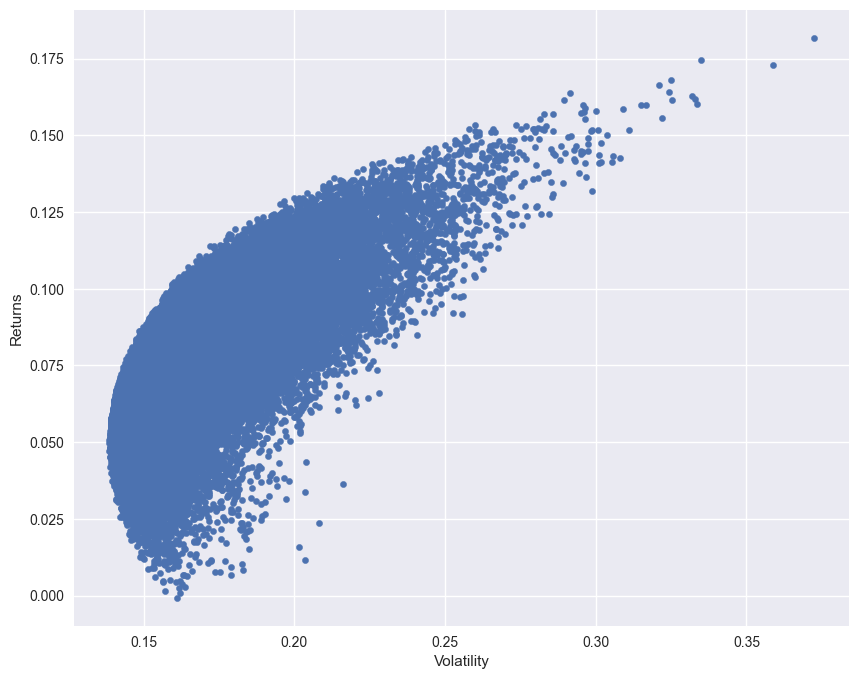

In [16]:
import seaborn as sns

plt.style.use('seaborn-v0_8')
df.plot.scatter(x='Volatility', y='Returns', figsize=(10,8), grid=True)
plt.title="Volatility vs Returns"
plt.show()

In [18]:
table = data.pivot(columns='ticker')
table.head()

returns_daily = table.pct_change()
returns_daily.head(20)
returns_annual = returns_daily.mean() *250
cov_daily = returns_daily.cov()
cov_annual = cov_daily *250

port_returns=[]
port_volatility = []
port_weights = []
sharpe_ratio =[]

num_assets = len(selected)
num_portfolios = 50000

np.random.seed =(101)

for p in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /=np.sum(weights)
                     
    returns = np.dot(weights,returns_annual)

    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual,weights)))

    ratio = returns / volatility
    port_returns.append(returns)
    port_volatility.append(volatility)
    port_weights.append(weights)

    sharpe_ratio.append(ratio)


portfolio ={'Returns': port_returns, 'Volatility':port_volatility, 'Sharpe_Ratio': sharpe_ratio}

for counter, symbol in enumerate(selected):
    portfolio[symbol+' Weight'] = [Weight[counter]for Weight in port_weights]

df = pd.DataFrame(portfolio)

df

,Returns,Volatility,Sharpe_Ratio,CNP Weight,F Weight,WMT Weight,TSLA Weight,GE Weight
0,0.119128,0.201812,0.590292,0.371965,0.076545,0.150825,0.347458,0.053207
1,0.061677,0.165210,0.373322,0.284167,0.344190,0.055398,0.160917,0.155327
2,0.037413,0.145973,0.256299,0.155424,0.310503,0.192351,0.035920,0.305803
3,0.060493,0.156700,0.386043,0.338074,0.305652,0.097659,0.109876,0.148738
4,0.073470,0.164064,0.447815,0.153443,0.096883,0.147502,0.226341,0.375832
...,...,...,...,...,...,...,...,...
49995,0.060655,0.161696,0.375118,0.308617,0.297999,0.018625,0.160702,0.214057
49996,0.101299,0.206815,0.489806,0.201386,0.288273,0.158822,0.340600,0.010918
49997,0.078444,0.151198,0.518819,0.262897,0.120247,0.294888,0.132892,0.189077
49998,0.103711,0.183680,0.564630,0.270130,0.132299,0.232324,0.282058,0.083189


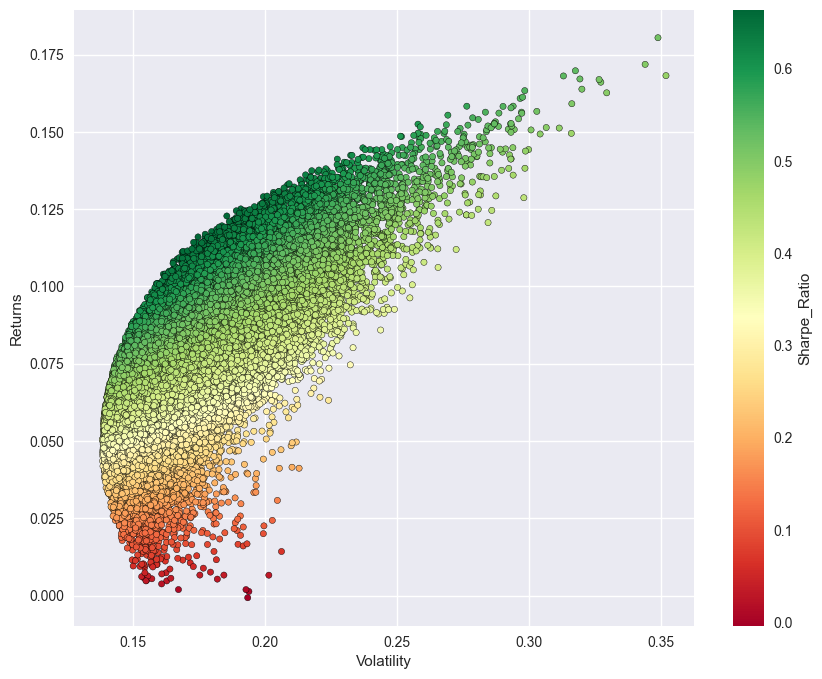

In [20]:
import seaborn as sns

plt.style.use('seaborn-v0_8-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe_Ratio', cmap='RdYlGn',edgecolors='black', figsize=(10,8), grid=True)
plt.title="Volatility vs Returns"
plt.show()

In [24]:
import seaborn as sns

max_sharpe = df['Sharpe_Ratio'].max()

sharpe_portfolio= df.loc(df['Sharpe_Ratio']==max_sharpe)

min_vol = df['Volatility'].min()

min_vol_portfolio= df.loc(df['Volatility']==min_vol)

plt.scatter( x=sharpe_portfolio['Volatility'], y=sharpe_portfolio['Returns'], marker='D', c='Red' )

plt.scatter( x=min_vol_portfolio['Volatility'], y=min_vol_portfolio['Returns'], marker='D', c='Blue' )


plt.style.use('seaborn-v0_8-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe_Ratio', cmap='RdYlGn',edgecolors='black', figsize=(10,8), grid=True)
plt.title="Volatility vs Returns"
plt.show(  )

TypeError: unhashable type: 'Series'

In [22]:
print(min_vol_portfolio.T*100)
print(sharpe_portfolio.T*100)

NameError: name 'min_vol_portfolio' is not defined